In [1]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [2]:
dataset_df = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/train.csv')

In [3]:
dataset_df.shape

(617, 58)

In [4]:
dataset_df.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


In [5]:
dataset_df.describe()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
count,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,...,616.000000,617.000000,615.000000,617.000000,617.000000,617.000000,617.000000,617.000000,616.000000,617.000000
mean,0.477149,3502.013221,118.624513,38.968552,10.128242,5.545576,0.060320,10.566447,8.053012,5350.388655,...,5.433199,3.533905,0.421501,20.724856,131.714987,14679.595398,31.489716,50.584437,8.530961,0.175041
std,0.468388,2300.322717,127.838950,69.728226,10.518877,2.551696,0.416817,4.350645,65.166943,3021.326641,...,11.496257,50.181948,1.305365,9.991907,144.181524,19352.959387,9.864239,36.266251,10.327010,0.380310
min,0.081187,192.593280,85.200147,3.177522,8.138688,0.699861,0.025578,3.396778,1.229900,1693.624320,...,0.173229,0.497060,0.067730,4.102182,72.611063,13.038894,9.432735,0.897628,0.001129,0.000000
25%,0.252107,2197.345480,85.200147,12.270314,8.138688,4.128294,0.025578,8.129580,1.229900,4155.702870,...,0.173229,0.497060,0.067730,14.036718,72.611063,2798.992584,25.034888,23.011684,0.124392,0.000000
50%,0.354659,3120.318960,85.200147,20.533110,8.138688,5.031912,0.025578,10.461320,1.229900,4997.960730,...,3.028141,1.131000,0.250601,18.771436,72.611063,7838.273610,30.608946,41.007968,0.337827,0.000000
75%,0.559763,4361.637390,113.739540,39.139886,8.138688,6.431634,0.036845,12.969516,5.081244,6035.885700,...,6.238814,1.512060,0.535067,25.608406,127.591671,19035.709240,36.863947,67.931664,21.978000,0.000000
max,6.161666,28688.187660,1910.123198,630.518230,178.943634,38.270880,10.315851,38.971568,1463.693448,53060.599240,...,137.932739,1244.227020,31.365763,135.781294,1497.351958,143790.071200,81.210825,191.194764,21.978000,1.000000


<Axes: ylabel='Class'>

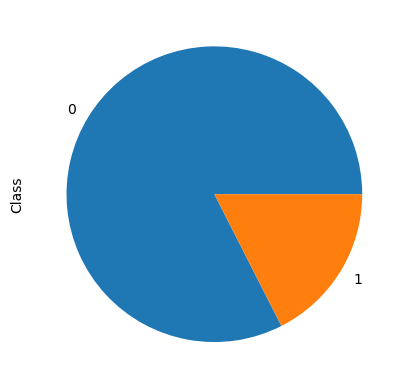

In [6]:
plot = dataset_df.Class.value_counts()
plot.plot(kind='pie')

In [7]:
NUM_FEATURE_COLUMNS = [i for i in dataset_df.columns if i not in ['Id','EJ', 'Class' ]]

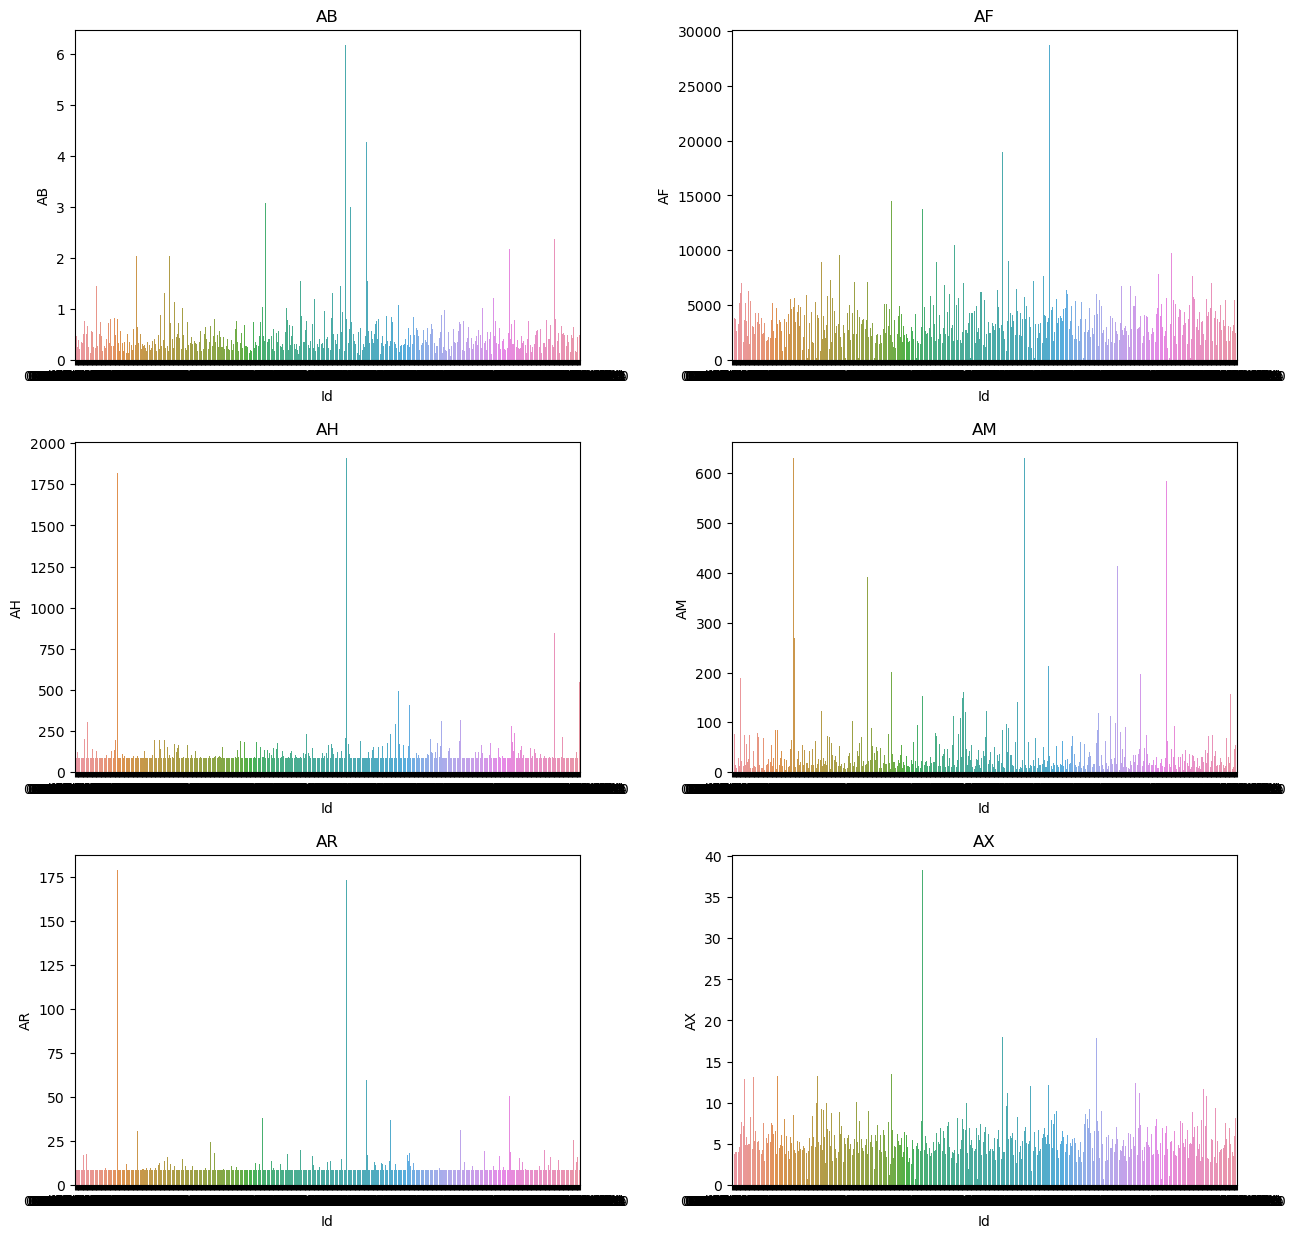

In [8]:
figure, axis = plt.subplots(3,2, figsize=(15,15))
plt.subplots_adjust(hspace=0.25, wspace=0.3)

for i, column_name in enumerate(NUM_FEATURE_COLUMNS[:6]):
    row = i//2
    col = i%2
    bp = sns.barplot(ax=axis[row, col], x=dataset_df['Id'], y = dataset_df[column_name])
    axis[row, col].set_title(column_name)
plt.show()

In [9]:
FEATURE_COLUMNS = [i for i in dataset_df.columns if i not in ["Id"]]

# KFold validation


In [10]:
kf = KFold(n_splits=5)

In [11]:
ID_LIST = dataset_df.index

In [12]:
# Create a dataframe of required size with zero values.
oof = pd.DataFrame(data=np.zeros((len(ID_LIST),1)), index=ID_LIST)


In [13]:
# Create an empty dictionary to store the models trained for each fold.
models = {}

# Create empty dict to save metircs for the models trained for each fold.
accuracy = {}
cross_entropy = {}

# Save the name of the label column to a variable.
label = "Class"

In [14]:
tfdf.keras.get_all_models()


[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

In [15]:
# Calculate the number of negative and positive values in `Class` column
neg, pos = np.bincount(dataset_df['Class'])
# Calculate total samples
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 617
    Positive: 108 (17.50% of total)



In [16]:
# Calculate the number of samples for each label.
neg, pos = np.bincount(dataset_df['Class'])

# Calculate total samples.
total = neg + pos

# Calculate the weight for each label.
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.61
Weight for class 1: 2.86


In [17]:
# train random forest
for i, (train_index, valid_index) in enumerate(kf.split (X = dataset_df)):
    print('#### fold', i+1)
    train_df = dataset_df.iloc[train_index]
    valid_df = dataset_df.iloc[valid_index]
    valid_ids = valid_df.index.values
    train_df = train_df[FEATURE_COLUMNS]
    valid_df = valid_df[FEATURE_COLUMNS]
    train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_df, label = label)
    valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_df, label=label)
    rf = tfdf.keras.RandomForestModel()
    rf.compile(metrics = ['accuracy', 'binary_crossentropy'])
    rf.fit(x = train_ds, class_weight = class_weight)
    models[f'fold_{i+1}'] = rf
    predict = rf.predict(x=valid_ds)
    oof.loc[valid_ids, 0] = predict.flatten()
    evaluation = rf.evaluate(x=valid_ds, return_dict=True)
    accuracy[f'fold_[i+1]'] = evaluation['accuracy']
    cross_entropy[f'fold_{i+1}'] = evaluation['binary_crossentropy']

#### fold 1
Use /tmp/tmpuym56oc_ as temporary training directory
Reading training dataset...
Training dataset read in 0:00:05.476310. Found 493 examples.
Training model...
Model trained in 0:00:00.214910
Compiling model...


[INFO 23-07-28 05:05:47.3157 UTC kernel.cc:1243] Loading model from path /tmp/tmpuym56oc_/model/ with prefix 18dff74e31fb4f71
[INFO 23-07-28 05:05:47.3419 UTC decision_forest.cc:660] Model loaded with 300 root(s), 14268 node(s), and 56 input feature(s).
[INFO 23-07-28 05:05:47.3422 UTC abstract_model.cc:1311] Engine "RandomForestOptPred" built
[INFO 23-07-28 05:05:47.3422 UTC kernel.cc:1075] Use fast generic engine


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model compiled.
1/1 [==============================] - 1s 1s/step - loss: 0.0000e+00 - accuracy: 0.9516 - binary_crossentropy: 0.2182
#### fold 2
Use /tmp/tmpy3wxudex as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.732685. Found 493 examples.
Training model...
Model trained in 0:00:00.164159
Compiling model...


[INFO 23-07-28 05:05:52.0072 UTC kernel.cc:1243] Loading model from path /tmp/tmpy3wxudex/model/ with prefix ed2f20990faa484f
[INFO 23-07-28 05:05:52.0294 UTC decision_forest.cc:660] Model loaded with 300 root(s), 13582 node(s), and 56 input feature(s).
[INFO 23-07-28 05:05:52.0295 UTC kernel.cc:1075] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 277ms/step - loss: 0.0000e+00 - accuracy: 0.8790 - binary_crossentropy: 0.2608
#### fold 3
Use /tmp/tmpo520oyyx as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.747359. Found 494 examples.
Training model...
Model trained in 0:00:00.156469
Compiling model...


[INFO 23-07-28 05:05:53.8802 UTC kernel.cc:1243] Loading model from path /tmp/tmpo520oyyx/model/ with prefix 364f808f03d6492e
[INFO 23-07-28 05:05:53.9012 UTC decision_forest.cc:660] Model loaded with 300 root(s), 13376 node(s), and 56 input feature(s).
[INFO 23-07-28 05:05:53.9013 UTC kernel.cc:1075] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 277ms/step - loss: 0.0000e+00 - accuracy: 0.9024 - binary_crossentropy: 0.2741
#### fold 4
Use /tmp/tmpbwp5fmts as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.756501. Found 494 examples.
Training model...
Model trained in 0:00:00.158791
Compiling model...


[INFO 23-07-28 05:05:55.7503 UTC kernel.cc:1243] Loading model from path /tmp/tmpbwp5fmts/model/ with prefix ebec6c5e5c9f46fc
[INFO 23-07-28 05:05:55.7715 UTC decision_forest.cc:660] Model loaded with 300 root(s), 13434 node(s), and 56 input feature(s).
[INFO 23-07-28 05:05:55.7715 UTC kernel.cc:1075] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 274ms/step - loss: 0.0000e+00 - accuracy: 0.9024 - binary_crossentropy: 0.2717
#### fold 5
Use /tmp/tmpu4q50_7u as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.687085. Found 494 examples.
Training model...
Model trained in 0:00:00.160191
Compiling model...


[INFO 23-07-28 05:05:57.5369 UTC kernel.cc:1243] Loading model from path /tmp/tmpu4q50_7u/model/ with prefix 647af38fce104f20
[INFO 23-07-28 05:05:57.5597 UTC decision_forest.cc:660] Model loaded with 300 root(s), 13980 node(s), and 56 input feature(s).
[INFO 23-07-28 05:05:57.5598 UTC abstract_model.cc:1311] Engine "RandomForestOptPred" built
[INFO 23-07-28 05:05:57.5598 UTC kernel.cc:1075] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 268ms/step - loss: 0.0000e+00 - accuracy: 0.9512 - binary_crossentropy: 0.2172


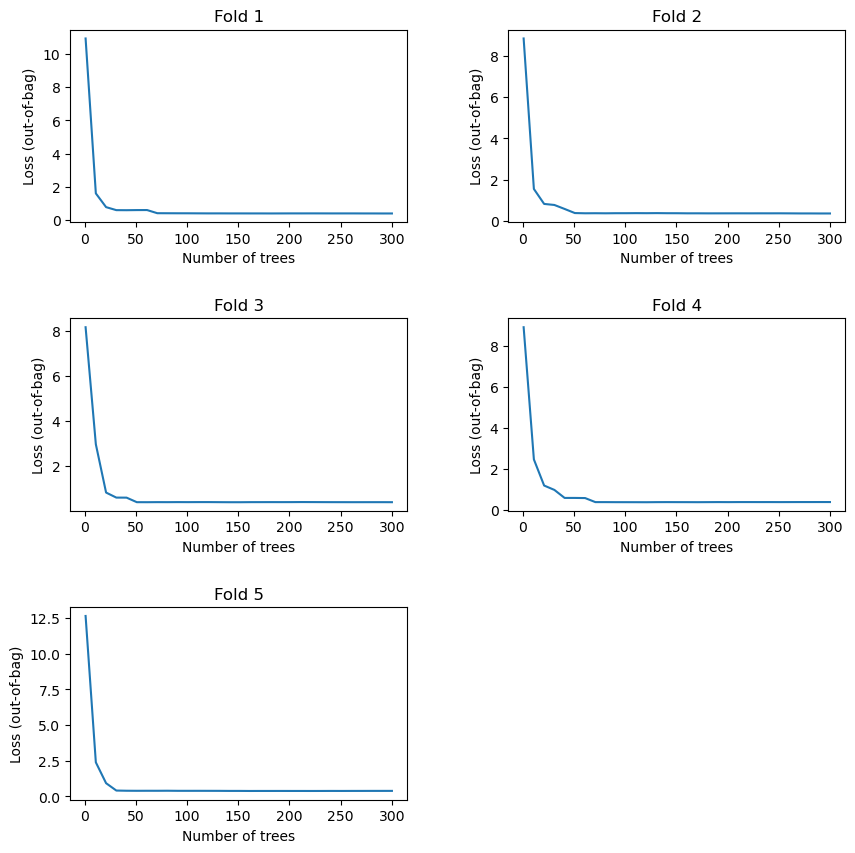

In [18]:
# evaluate the model
figure, axis = plt.subplots(3, 2, figsize=(10, 10))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

for i, fold_no in enumerate(models.keys()):
    row = i//2
    col = i % 2
    logs = models[fold_no].make_inspector().training_logs()
    axis[row, col].plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
    axis[row, col].set_title(f"Fold {i+1}")
    axis[row, col].set_xlabel('Number of trees')
    axis[row, col].set_ylabel('Loss (out-of-bag)')

axis[2][1].set_visible(False)
plt.show()

In [19]:
for _model in models:
    inspector = models[_model].make_inspector()
    print(_model, inspector.evaluation())

fold_1 Evaluation(num_examples=493, accuracy=0.83384120423487, loss=0.4011864148867133, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)
fold_2 Evaluation(num_examples=493, accuracy=0.86791143186256, loss=0.374230902610848, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)
fold_3 Evaluation(num_examples=494, accuracy=0.8625237360976467, loss=0.39912028399338717, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)
fold_4 Evaluation(num_examples=494, accuracy=0.8742180068903357, loss=0.38689070260817593, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)
fold_5 Evaluation(num_examples=494, accuracy=0.8477430594687857, loss=0.39049966583287166, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)


In [20]:
average_loss = 0
average_acc = 0

for _model in  models:
    average_loss += cross_entropy[_model]
    average_acc += accuracy[_model]
    print(f"{_model}: acc: {accuracy[_model]:.4f} loss: {cross_entropy[_model]:.4f}")

print(f"\nAverage accuracy: {average_acc/5:.4f}  Average loss: {average_loss/5:.4f}")

KeyError: 'fold_1'

In [ ]:
inspector = models['fold_1'].make_inspector()

print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

In [ ]:
# Each line is: (feature name, (index of the feature), importance score)
inspector.variable_importances()["NUM_AS_ROOT"]

In [ ]:
test_df = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/test.csv')
test_ds_pd = test_df
test_df_columns = test_ds_pd.columns.tolist()
TEST_FEATURE_COLUMNS = [i for i in FEATURE_COLUMNS \
                        if i in test_df_columns and i != "Class"]
test_ds_pd = test_ds_pd[TEST_FEATURE_COLUMNS]
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_ds_pd)
predictions = models['fold_1'].predict(test_ds)
n_predictions= [[round(abs(i-1), 8), i] for i in predictions.ravel()]
print(n_predictions)

In [ ]:
# Create a DataFrame with the predictions.
predictions = pd.DataFrame(n_predictions, columns=['id', 'prediction'])

# Save the DataFrame to a CSV file.
predictions.to_csv('submission.csv', index=False)